In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

from run import Run
from runs_db import db as runs_db

[('martak', 81), ('gcp', 57), ('deepnet2', 34), ('acer', 6)]


In [2]:
log_path = '/home/fiit/logs'
runs = []

for server in runs_db:
    paths = glob.glob(os.path.join(log_path, server, '*'))
    paths = iter(sorted(paths))

    try:
        for (number, type_, code) in runs_db[server]:
            for _ in range(number):
                try:
                    path = next(paths)
                    runs.append(Run(path, type_, code))
                except KeyError:
                    print(path)
    except StopIteration:
        pass


In [9]:
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

task_max = {
    'dep': True,
    'lmo': False,
    'ner': True,
    'pos': True
}

def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(5*len(langs), 4*len(tasks)), squeeze=False)

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')
        
    for ax_row in axes:
        for ax in ax_row:
            ax.legend()

    plt.show()
    
def print_results(metric_func, metric_max_func, tasks, langs, run_codes=None, run_types=None):
    
    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):
                result = run.metric_eval(
                    metric=metric_func(task),
                    max_=metric_max_func(task),
                    task=task,
                    language=lang)
                print(f'{run.code} {run.type} {task} {lang}: {result}')
        

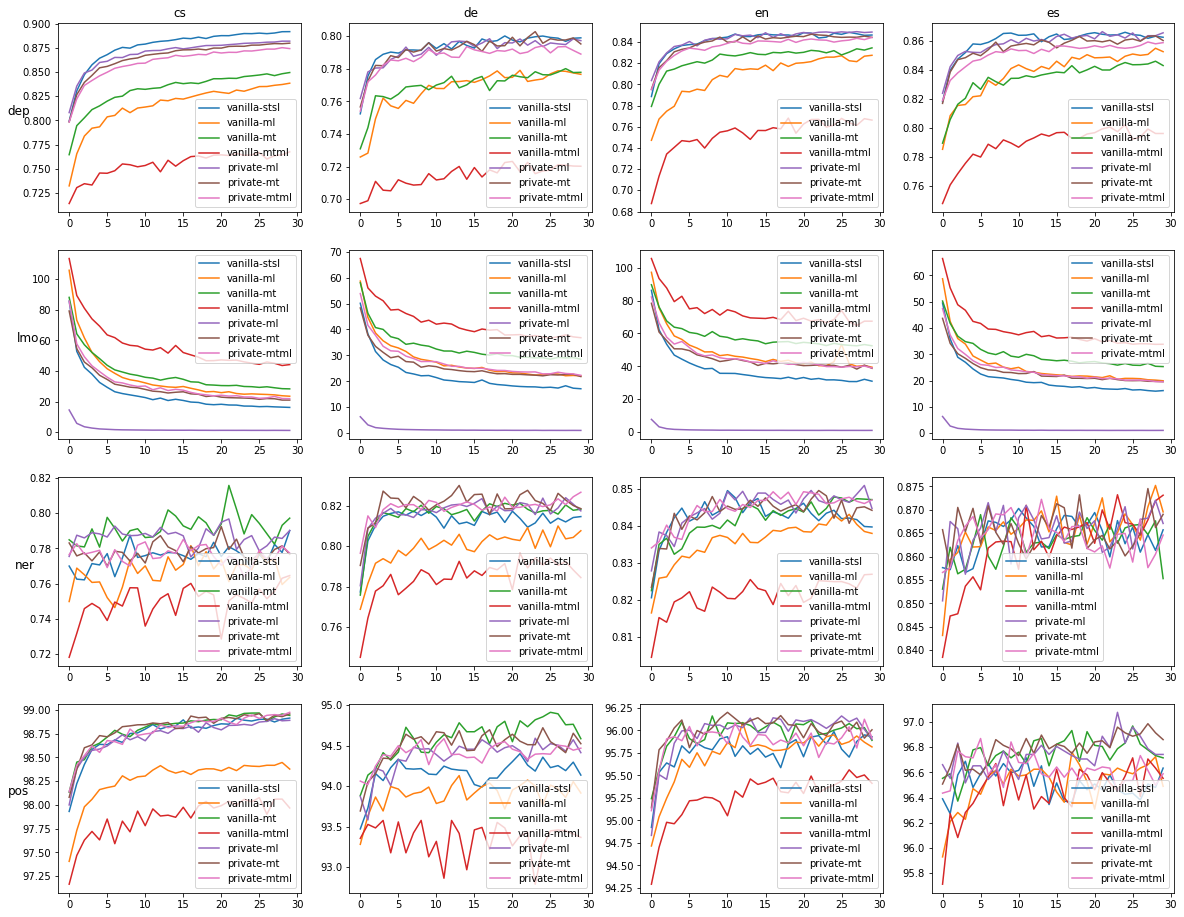

private ml dep cs: (0.8818727949993918, 29)
private mt dep cs: (0.8797988633927899, 30)
private mtml dep cs: (0.8742085170230391, 30)
private ml dep de: (0.79733054496248, 30)
private mt dep de: (0.7994218231024727, 21)
private mtml dep de: (0.7930864805019068, 24)
private ml dep en: (0.8494314733136406, 30)
private mt dep en: (0.8441306195119977, 17)
private mtml dep en: (0.8411362440820621, 26)
private ml dep es: (0.863837872070931, 28)
private mt dep es: (0.8632950330227087, 19)
private mtml dep es: (0.8556048131728943, 24)
private ml lmo cs: (1.0934995393760425, 30)
private mt lmo cs: (20.939035266329487, 30)
private mtml lmo cs: (21.867461665888925, 30)
private ml lmo de: (1.0837892014120665, 30)
private mt lmo de: (21.841272860099473, 30)
private mtml lmo de: (22.324531953948213, 30)
private ml lmo en: (1.0635896570389831, 29)
private mt lmo en: (38.33178276692361, 28)
private mtml lmo en: (39.05648536107499, 30)
private ml lmo es: (1.060616383293054, 28)
private mt lmo es: (19.6

In [13]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            ['private', 'vanilla',
            ],)
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, [
             'private',
            ], ['mtml', 'mt', 'ml'])

In [ ]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

In [ ]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['mtml'])